In [1]:
#import macroparameters
from experiment_metadata import *

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Import curve fitting package from scipy
if using_standard_curve == True:
    from sklearn.linear_model import LinearRegression
    
    
import os, sys, shutil

"""
if save_figures == 1:
    
    os.chdir('/src/output/')
    plt.savefig('Prior_Distributions.png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())
    """

def print_all_df(df):
    # Permanently changes the pandas settings
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    # All dataframes hereafter reflect these changes.
    display(df)
    
    print('**RESET_OPTIONS**')
    
    # Resets the options
    pd.reset_option('all')
    

In [2]:
# navigate into processed_data_files and grab the parsed dataset

os.chdir('/src/processed_data_files/')
os.getcwd()

items = os.listdir(".")

# lists all .csv
csv_list = []
for names in items:
    if names.endswith(".csv"):
        csv_list.append(names)
print(csv_list)



['220522_OPP2_titration_parsed_dataset.csv', '220522_OPP2_titration_tidy_data.csv']


In [3]:
##########################################################################################

# find the tidy dataset
for l in csv_list:
    if l[-13:] == 'tidy_data.csv':
        dataset = l
        
## get the dataset name
dataset_name, f_ext = os.path.splitext(dataset)
dataset_name = dataset_name[:-10]

tidy_data = pd.read_csv(dataset, header=0)

In [4]:
tidy_data.head

<bound method NDFrame.head of       Well   Sample ID  Time (Minutes)  RFUs  Gain Setting Chromatic Settings  \
0      C03   Sample X1               0  3181          1500          485_520_3   
1      C06   Sample X2               0  3042          1500          485_520_3   
2      F03   Sample X3               0  3076          1500          485_520_3   
3      F06   Sample X4               0  3066          1500          485_520_3   
4      I03   Sample X5               0  3137          1500          485_520_3   
...    ...         ...             ...   ...           ...                ...   
31585  I18  Sample X26             700   192           800          485_520_2   
31586  L15  Sample X27             700   152           800          485_520_2   
31587  L18  Sample X28             700   159           800          485_520_2   
31588  O15  Sample X29             700    64           800          485_520_2   
31589  O18  Sample X30             700    61           800          485_520_2  

In [6]:
experiments_filter = (tidy_data['Amplicon DNA Template'] == 'T7_GFP_MGA') | (tidy_data['Amplicon DNA Template'] == 'No Template')
experiments_df = tidy_data[experiments_filter]


In [7]:
system_arr = experiments_df['System'].unique()
print(type(system_arr))
print(system_arr)

<class 'numpy.ndarray'>
['OnePotPure B2']


In [8]:
Chromatic_arr = experiments_df['Chromatic Settings'].unique()
Chromatic_arr

array(['485_520_3', '635_680_1', '485_520_2'], dtype=object)

/src/processed_data_files


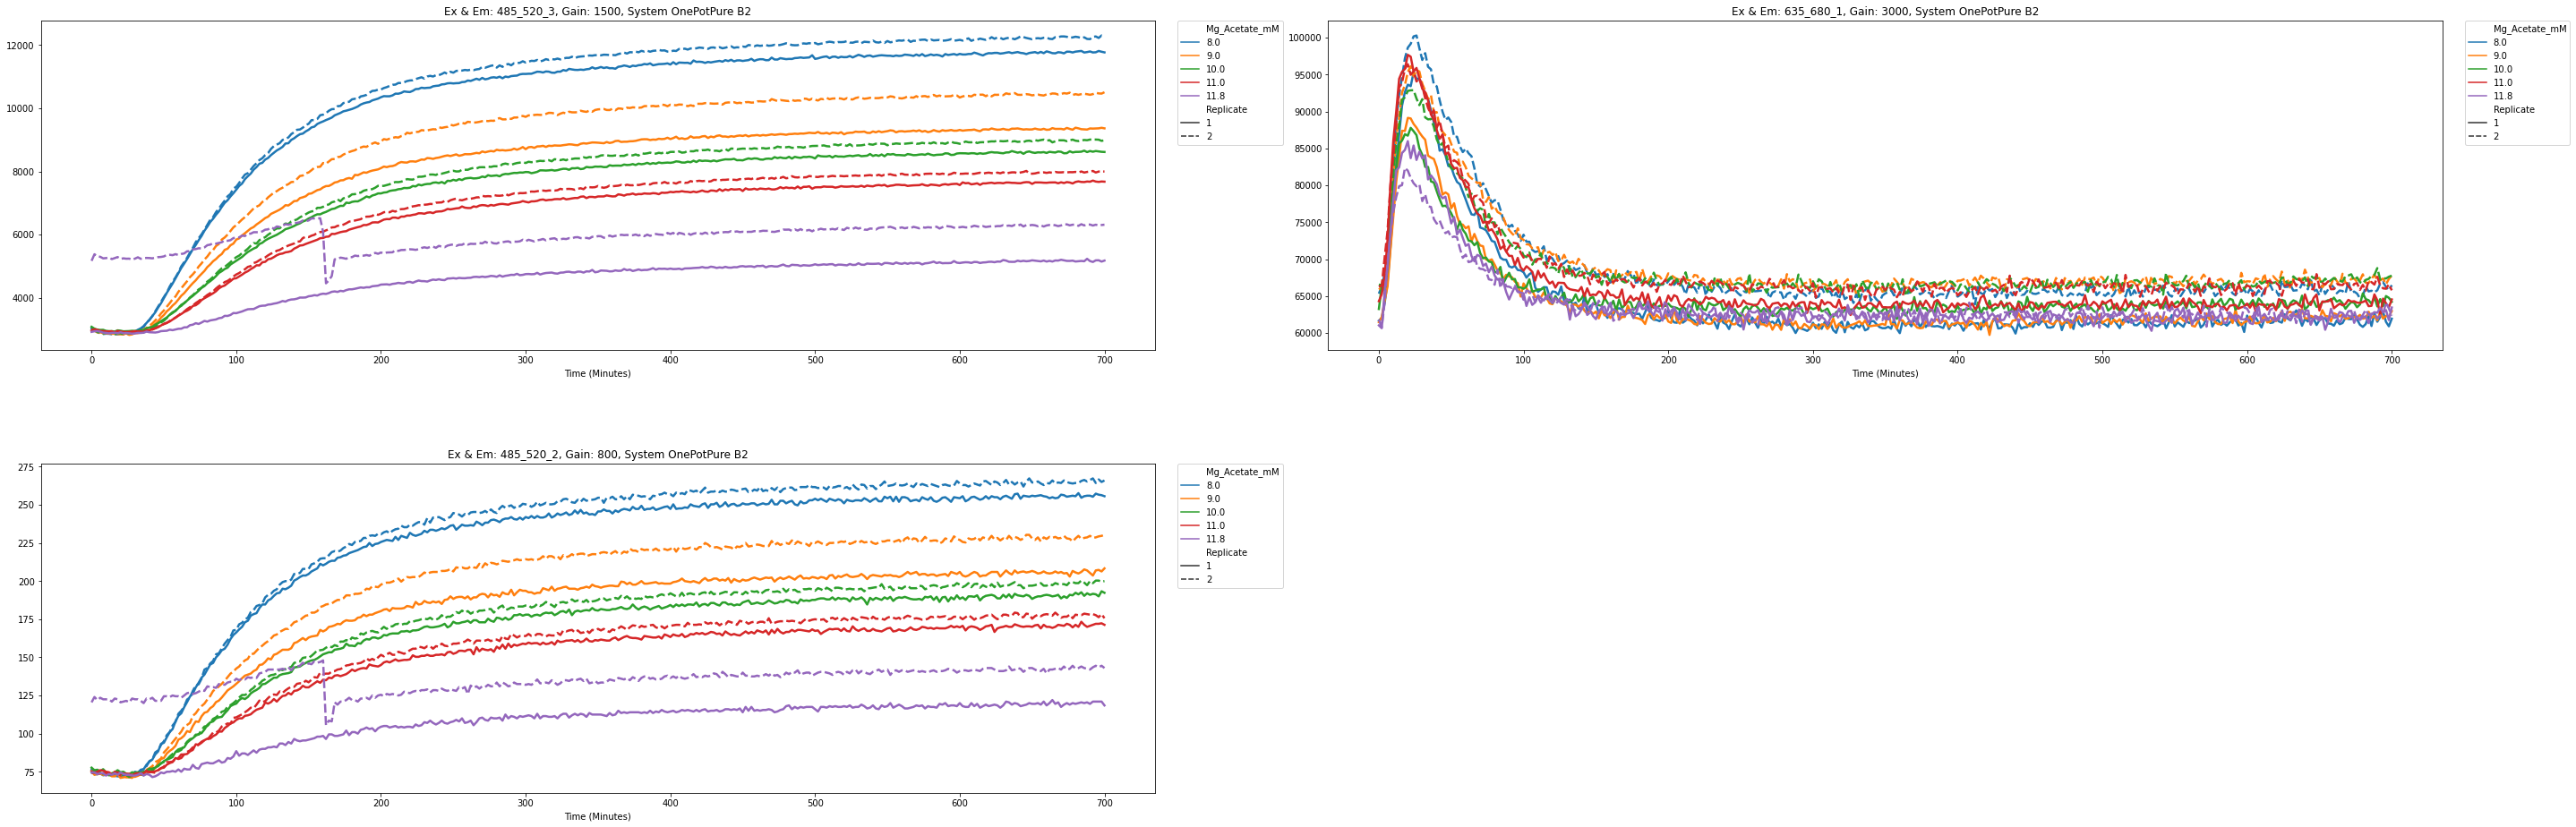

In [17]:
fig = plt.figure(figsize=(40, 40))

n=1


for s in experiments_df['System'].unique():
    isolated_system = experiments_df[experiments_df['System'] == s]
    
    for c in isolated_system['Chromatic Settings'].unique():
    
        isolated_system_and_chromatic = isolated_system[isolated_system['Chromatic Settings'] == c]
        
        for g in isolated_system_and_chromatic['Gain Setting'].unique():
            
            isolated_system_and_chromatic_gain = isolated_system_and_chromatic[isolated_system_and_chromatic['Gain Setting'] == g]
            #print(isolated_system_and_chromatic_gain)
            
            ax = plt.subplot(6, 2, n)
        
            sns.lineplot(data=isolated_system_and_chromatic_gain,
                         x='Time (Minutes)',
                         y= 'RFUs',
                         hue='Mg_Acetate_mM',
                         style = 'Replicate',
                         palette="tab10",
                         linewidth=2.5,
                         ax = ax,
                         ci = None,
                         legend = 'brief')

            ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            ax.set_title('Ex & Em: '+c + ', Gain: ' + str(g) + ', System '+s)
            ax.set_ylabel("")
            n+=1

plt.subplots_adjust(hspace=10)
fig.tight_layout()
#fig.suptitle("Initial Gain Investigation (AFUs)", fontsize=30, y=1.0)

if save_figures == 1:
    
    os.chdir('/src/output/')
    fig.savefig('Initial Gain Investigation.png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())

plt.show()
    

In [10]:
Chosen_Gain_Settings = {
    '635_680':3000,
    '485_520':1500
}

In [11]:
Chosen_chromatics = ['485_520_3', '635_680_1']

In [14]:
gain_df = pd.DataFrame(columns = tidy_data.columns)


for i, chrom in enumerate(Chosen_chromatics):
    
    mask = (tidy_data['Chromatic Settings'] == Chosen_chromatics[i])

    
    select_gain_df = tidy_data[mask]
    
    select_gain_df['Chromatic Settings'] = select_gain_df['Chromatic Settings'].map({'485_520_3':'485_520',
                                                                                     '635_680_1':'635_680',
                                                                                     },
                                                                                     na_action=None)

    
    gain_df = pd.concat([gain_df,select_gain_df], axis=0)
    
gain_df

/tmp/ipykernel_136/3470016995.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_gain_df['Chromatic Settings'] = select_gain_df['Chromatic Settings'].map({'485_520_3':'485_520',
/tmp/ipykernel_136/3470016995.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_gain_df['Chromatic Settings'] = select_gain_df['Chromatic Settings'].map({'485_520_3':'485_520',


,Well,Sample ID,Time (Minutes),RFUs,Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,K_Glutamate_mM,Mg_Acetate_mM,Reaction Type,Replicate,System,Reaction Temperature (°C),Performed by,Instrument,Experiment #,Assay Date
0,C03,Sample X1,0,3181,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
1,C06,Sample X2,0,3042,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
2,F03,Sample X3,0,3076,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
3,F06,Sample X4,0,3066,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
4,I03,Sample X5,0,3137,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,10.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,I18,Sample X26,700,65799,3000,635_680,T7_GFP_MGA,Grassman ES,40.0,10.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
21056,L15,Sample X27,700,64073,3000,635_680,T7_GFP_MGA,Grassman ES,40.0,11.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
21057,L18,Sample X28,700,61866,3000,635_680,T7_GFP_MGA,Grassman ES,40.0,11.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
21058,O15,Sample X29,700,55646,3000,635_680,None,NaN,NaN,NaN,Blank,1,NaN,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21


In [15]:
test = gain_df[gain_df['Chromatic Settings'] == '485_520']
test['Gain Setting'].unique()

array([1500], dtype=object)

In [16]:
#navigate to processed data files
os.chdir("/src/processed_data_files/")

gain_df.to_csv(dataset_name+"_gain_filtered_data.csv", header=True, index=False)


#navigate home for neatness
os.chdir('/src')

In [21]:
gain_df

,Well,Sample ID,Time (Minutes),RFUs,Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,K_Glutamate_mM,Mg_Acetate_mM,Reaction Type,Replicate,System,Reaction Temperature (°C),Performed by,Instrument,Experiment #,Assay Date
18411,C15,Sample X5,0,3642,1500,485_520,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
18412,F03,Sample X7,0,2924,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,1,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
18413,F06,Sample X8,0,2903,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,2,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
18414,F09,Sample X9,0,2908,1500,485_520,T7_GFP_MGA,Grassman ES,30.0,9.0,TXTL,1,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
18415,F12,Sample X10,0,2962,1500,485_520,T7_GFP_MGA,Grassman ES,30.0,9.0,TXTL,2,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,L03,Sample X19,720,61770,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,11.0,TXTL,1,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
12270,L06,Sample X20,720,59559,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,11.0,TXTL,2,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
12271,L09,Sample X21,720,62235,3000,635_680,T7_GFP_MGA,Grassman ES,30.0,11.0,TXTL,1,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
12272,L12,Sample X22,720,65523,3000,635_680,T7_GFP_MGA,Grassman ES,30.0,11.0,TXTL,2,OnePotPure B1,30,Alex Perkins,BMG POLARstar Omega,7,2022-05-19
